In [3]:
"""
Author        : Aditya Jain
Date Started  : December 16, 2022
About         : Testing random resizing for resolution agnostic training
"""
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import json
import numpy as np
import cv2

image_path   = 'moth1.jpeg'

/home/mila/a/aditya.jain/.conda/envs/milamoth_ai/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


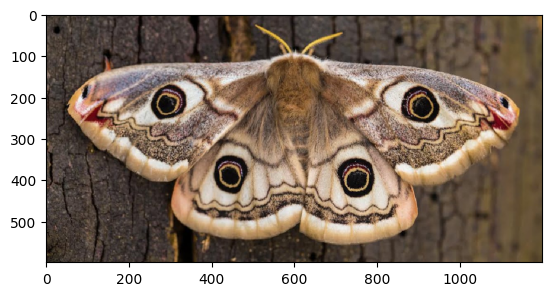

In [4]:
image     = Image.open(image_path)
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


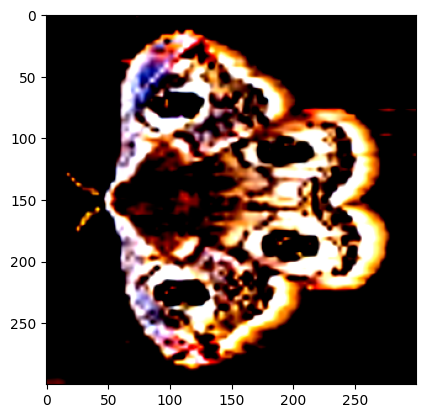

In [43]:
convert_to_tensor = transforms.ToTensor()
transforms_custom = transforms.RandomApply(torch.nn.ModuleList([
    transforms.Resize((75, 75))
]), p=0.5)
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
final_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms_custom,
                transforms.Resize((300, 300)),
                transforms.RandomHorizontalFlip(),
                transforms.Normalize(mean, std)
                ])

# new_img = convert_to_tensor(image)
# new_img = transforms_custom(new_img)
# print(new_img.shape)
new_img = final_transform(image)

plt.imshow(np.transpose(new_img))

#### Test lambda operator

In [39]:
def random_resize(img):
    """randomly resize image given a probability distribution"""
    
    random_num = np.random.uniform()
    
    if random_num <= 0.25:
        transform = transforms.Resize((150, 150))
        new_image = transform(image)
    elif random_num > 0.25 and random_num <= 0.5:
        transform = transforms.Resize((75, 75))
        new_image = transform(image)
    else:
        new_image = image
        
    return new_image

image     = Image.open(image_path)
transform = transforms.Lambda(random_resize)
image     = transform(image)
print(image.size)

(75, 75)
